# Meaning of the individual columns

- "title": [string],              # Title of the song.       
- "artist": [string],             # Artist of the song.
- "year": [int],                  # Release year of the song.
- "pos": [int],                   # Position of Billboard's Top 100 for year [year].
- "lyrics": [string],             # Lyrics of the song.
- "tags": [string array],         # Genre tags associated with artist of the song.
- "sentiment": {
   - "neg": [float],             # Negativity assoc. w/ lyrics. (between 0-1 inclusive, 1 being 100% negative).
   - "neu": [float],             # Neutrality assoc. w/ lyrics. (between 0-1 inclusive, 1 being 100% neutral).
   - "pos": [float],             # Positivity assoc. w/ lyrics. (between 0-1 inclusive, 1 being 100% positive).
   - "compound": [float]
    },
- "f_k_grade": [float],           # Flesch–Kincaid grade level of lyrics.
- "flesch_index": [float],        # Flesch reading ease score.
- "fog_index": [float],           # Gunning-Fog readability index.
- "difficult_words": [int],       # Number of words not on the Dale–Chall "easy" word list.
- "num_syllables": [int],         # Number of syllables in lyrics.
- "num_words": [int],             # Number of words in lyrics.
- "num_lines": [int],             # Number of lines in lyrics.
- "num_dupes": [int]              # Number of duplicate (repetitive) lines in lyrics.
}

# Imports

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
songs = pd.read_csv("../../data/old_datasets//CSV/1950_2015.csv")
songs.head(5)

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes
0,No other love have I\nOnly my love for you! \n...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,129,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16
1,(Pa pa pa pia)\n(Pa pa pa pia)\n\nDon't let th...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,297,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27
2,I believe for every drop of rain that falls \n...,['death by heart failure'],179.1,10,1953,4.4,90.77,133,21,"{'neg': 0.152, 'neu': 0.769, 'pos': 0.079, 'co...",I Believe,2.1,Frankie Laine,12,1
3,First the tide rushes in\nPlants a kiss on the...,['production music'],104.4,12,1953,4.0,100.24,89,15,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.2070000000...",Ebb Tide,0.5,Frank Chacksfield,5,2
4,Pretend you're happy when you're blue\nIt isn'...,"['american', 'death by lung cancer', 'easy lis...",119.7,13,1953,4.4,99.23,99,15,"{'neg': 0.078, 'neu': 0.7000000000000001, 'pos...",Pretend,0.9,Nat King Cole,9,0


# Number of artists and songs, associated distributions

In [3]:
for i,row in songs.iterrows():
    c = Counter(row.lyrics.split())
    songs.at[i, 'number_of_tokens'] = sum(c.values())
    songs.at[i, 'number_of_types'] = int(len(c))

In [4]:
artists = np.unique(songs.artist)
print(len(np.unique(songs.artist)))
# np.unique(songs.decades)

1308


In [15]:
mean ={}
for a in artists:
    mean[a] = int(np.mean(songs.number_of_tokens[songs.artist==a]))

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


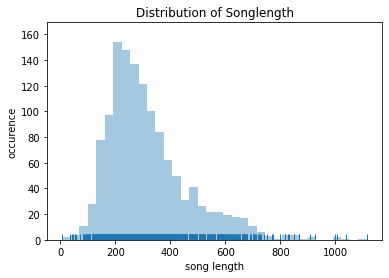

In [16]:
ax = sns.distplot(list(mean.values()), rug=True, kde=False)
ax.set_xlabel("song length")
ax.set_ylabel("occurence")
ax.set_title("Distribution of Songlength")
plt.savefig("../../images/dataexploration/songlength")
plt.show()

In [22]:
songs.sort_values('year')
songs.head(5)

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes,number_of_tokens,number_of_types
0,No other love have I\nOnly my love for you! \n...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16,129.0,54.0
1,(Pa pa pa pia)\n(Pa pa pa pia)\n\nDon't let th...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27,297.0,89.0
2,I believe for every drop of rain that falls \n...,['death by heart failure'],179.1,10,1953,4.4,90.77,21,"{'neg': 0.152, 'neu': 0.769, 'pos': 0.079, 'co...",I Believe,2.1,Frankie Laine,12,1,133.0,87.0
3,First the tide rushes in\nPlants a kiss on the...,['production music'],104.4,12,1953,4.0,100.24,15,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.2070000000...",Ebb Tide,0.5,Frank Chacksfield,5,2,89.0,65.0
4,Pretend you're happy when you're blue\nIt isn'...,"['american', 'death by lung cancer', 'easy lis...",119.7,13,1953,4.4,99.23,15,"{'neg': 0.078, 'neu': 0.7000000000000001, 'pos...",Pretend,0.9,Nat King Cole,9,0,99.0,72.0


## Adding the decades

In [28]:
songs['decades'] = '0'
songs.head(2)

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes,number_of_tokens,number_of_types,decades
0,No other love have I\nOnly my love for you! \n...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16,129.0,54.0,0
1,(Pa pa pa pia)\n(Pa pa pa pia)\n\nDon't let th...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27,297.0,89.0,0


In [30]:
s = songs.copy()
for i, row in s.iterrows():
    if row.year >=1950 and row.year < 1960:
        s.at[i, 'decades'] = '1950s'
    if row.year >=1960 and row.year < 1970:
        s.at[i, 'decades'] = '1960s'
    if row.year >=1970 and row.year < 1980:
        s.at[i, 'decades'] = '1970s'
    if row.year >=1980 and row.year < 1990:
        s.at[i, 'decades'] = '1980s'
    if row.year >=1990 and row.year < 2000:
        s.at[i, 'decades'] = '1990s'
    if row.year >=2000 and row.year < 2010:
        s.at[i, 'decades'] = '2000s'
    if row.year >=2010 and row.year < 2020:
        s.at[i, 'decades'] = '2010s'

In [32]:
s.head(5)

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes,number_of_tokens,number_of_types,decades
0,No other love have I\nOnly my love for you! \n...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16,129.0,54.0,1950s
1,(Pa pa pa pia)\n(Pa pa pa pia)\n\nDon't let th...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27,297.0,89.0,1950s
2,I believe for every drop of rain that falls \n...,['death by heart failure'],179.1,10,1953,4.4,90.77,21,"{'neg': 0.152, 'neu': 0.769, 'pos': 0.079, 'co...",I Believe,2.1,Frankie Laine,12,1,133.0,87.0,1950s
3,First the tide rushes in\nPlants a kiss on the...,['production music'],104.4,12,1953,4.0,100.24,15,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.2070000000...",Ebb Tide,0.5,Frank Chacksfield,5,2,89.0,65.0,1950s
4,Pretend you're happy when you're blue\nIt isn'...,"['american', 'death by lung cancer', 'easy lis...",119.7,13,1953,4.4,99.23,15,"{'neg': 0.078, 'neu': 0.7000000000000001, 'pos...",Pretend,0.9,Nat King Cole,9,0,99.0,72.0,1950s


In [33]:
s.to_csv("../../data/CSV/1950_2015_plus_dates.csv")

In [5]:
songs = pd.read_csv('../../data/old_datasets/CSV/1950_2015_plus_dates.csv')

In [3]:
songs.head(5)

,Unnamed: 0,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes,number_of_tokens,number_of_types,decades
0,0,No other love have I\nOnly my love for you! \n...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16,129.0,54.0,1950s
1,1,(Pa pa pa pia)\n(Pa pa pa pia)\n\nDon't let th...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27,297.0,89.0,1950s
2,2,I believe for every drop of rain that falls \n...,['death by heart failure'],179.1,10,1953,4.4,90.77,21,"{'neg': 0.152, 'neu': 0.769, 'pos': 0.079, 'co...",I Believe,2.1,Frankie Laine,12,1,133.0,87.0,1950s
3,3,First the tide rushes in\nPlants a kiss on the...,['production music'],104.4,12,1953,4.0,100.24,15,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.2070000000...",Ebb Tide,0.5,Frank Chacksfield,5,2,89.0,65.0,1950s
4,4,Pretend you're happy when you're blue\nIt isn'...,"['american', 'death by lung cancer', 'easy lis...",119.7,13,1953,4.4,99.23,15,"{'neg': 0.078, 'neu': 0.7000000000000001, 'pos...",Pretend,0.9,Nat King Cole,9,0,99.0,72.0,1950s


In [4]:
# c = Counter(songs.artist)
c = Counter(songs.decades)
c

Counter({'1950s': 221,
         '1990s': 671,
         '1980s': 759,
         '1970s': 645,
         '1960s': 519,
         '2000s': 745,
         '2010s': 468})

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/var/folders/d9/1b92tl_13g32z4j72swk9lh40000gn/T/ipykernel_1653/1194994716.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks_labels)


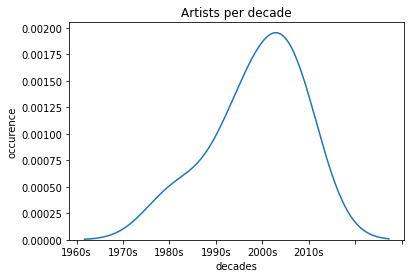

In [7]:
ax = sns.distplot(list(c.values()), hist=False)
ax.set_xlabel("decades")
ax.set_ylabel("occurence")
ax.set_title("Artists per decade")
x_ticks_labels = np.unique(songs.decades)
ax.set_xticklabels(x_ticks_labels)
plt.savefig("../../images/dataexploration/songnumber_per_artist_decades.png")
plt.show()

In [49]:
import pandas as pd

In [50]:
songs = pd.read_csv("../../data/CSV/1950_2015_plus_dates.csv", index_col=0)

In [51]:
songs.head(5)

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes,number_of_tokens,number_of_types,decades,stemmed_text,POS_tags,POS
0,no other love have ionly my love for you! only...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16,129.0,54.0,1950s,no other love have ionli my love for you ! on...,"['DT', 'JJ', 'NN', 'VBP', 'RB', 'PRP$', 'NN', ...",other other free other other free other other ...
1,pa pa pa pia pa pa pa pia don't let the star...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27,297.0,89.0,1950s,pa pa pa pia pa pa pa pia do n't let the star...,"['_SP', 'NNP', 'NNP', 'NNP', 'NN', '_SP', 'NNP...",only many many many many many only many many m...
2,i believe for every drop of rain that falls a ...,['death by heart failure'],179.1,10,1953,4.4,90.77,21,"{'neg': 0.152, 'neu': 0.769, 'pos': 0.079, 'co...",I Believe,2.1,Frankie Laine,12,1,133.0,87.0,1950s,i believ for everi drop of rain that fall a f...,"['PRP', 'VBP', 'IN', 'DT', 'NN', 'IN', 'NN', '...",great somewhere new loud drop rain flower grow...
3,first the tide rushes inplants a kiss on the s...,['production music'],104.4,12,1953,4.0,100.24,15,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.2070000000...",Ebb Tide,0.5,Frank Chacksfield,5,2,89.0,65.0,1950s,first the tide rush inplant a kiss on the sho...,"['RB', 'DT', 'NN', 'VBZ', 'NNPS', 'DT', 'NN', ...",shorethen oncoming open last dark tide kiss se...
4,pretend you're happy when you're blueit isn't ...,"['american', 'death by lung cancer', 'easy lis...",119.7,13,1953,4.4,99.23,15,"{'neg': 0.078, 'neu': 0.7000000000000001, 'pos...",Pretend,0.9,Nat King Cole,9,0,99.0,72.0,1950s,pretend you 're happi when you 're blueit is ...,"['VB', 'PRP', 'VBP', 'JJ', 'WRB', 'PRP', 'VBP'...",happy hard bad little aloneand blueit happines...


## Number of songs per decade

Text(0, 0.5, 'Count')

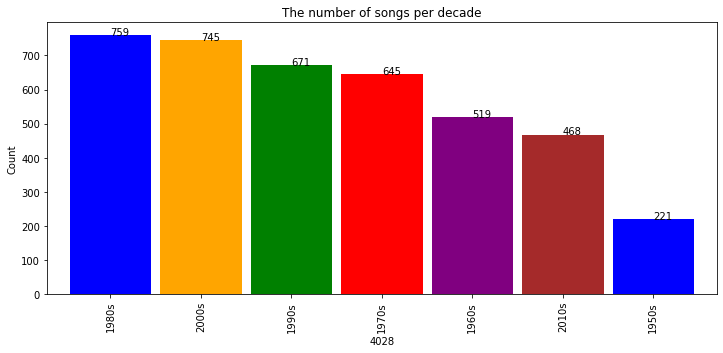

In [6]:
s = songs['decades'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.decades + 0.2 , v.decades, color='black')

ax.set_xlabel(len(songs.decades))
plt.title("The number of songs per decade")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Count')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")


## Number of songs per year within a decade

### 1950er

In [10]:
a = songs[songs['decades'] == "1950s"]

Text(0, 0.5, 'Anzahl')

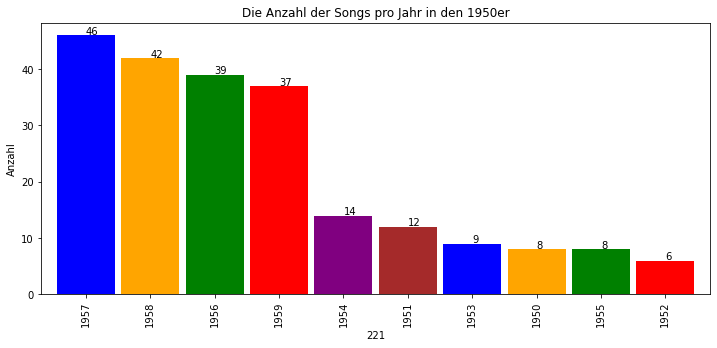

In [41]:
s = a['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(a.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 1950er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")


### 1960er

In [14]:
b = songs[songs['decades'] == "1960s"]

Text(0, 0.5, 'Anzahl')

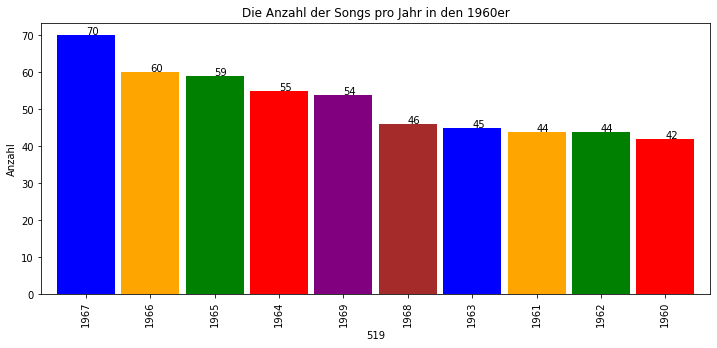

In [40]:
s = b['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(b.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 1960er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

### 1970er

In [42]:
c = songs[songs['decades'] == "1970s"]

Text(0, 0.5, 'Anzahl')

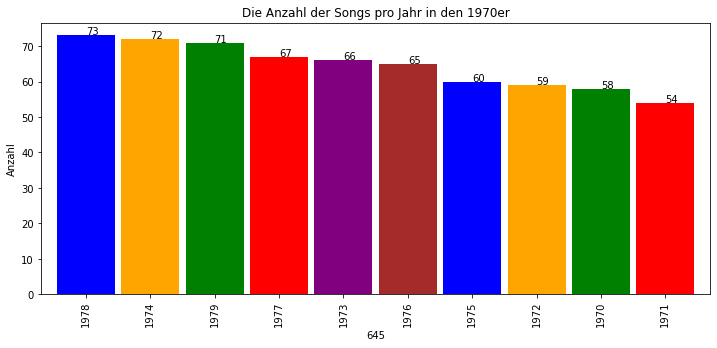

In [43]:
s = c['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(c.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 1970er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

### 1980er

In [21]:
d = songs[songs['decades'] == "1980s"]

Text(0, 0.5, 'Anzahl')

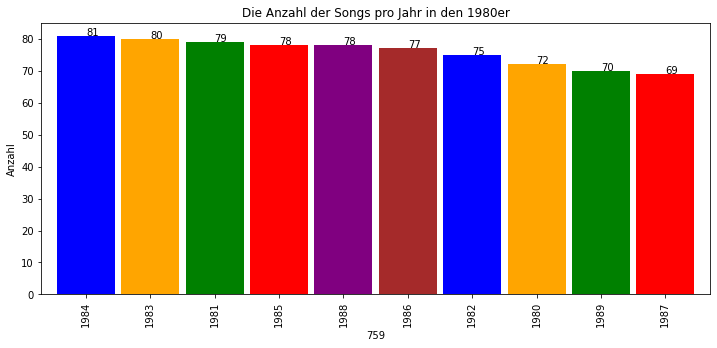

In [38]:
s = d['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(d.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 1980er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

### 1990er

In [28]:
e = songs[songs['decades'] == "1990s"]

Text(0, 0.5, 'Anzahl')

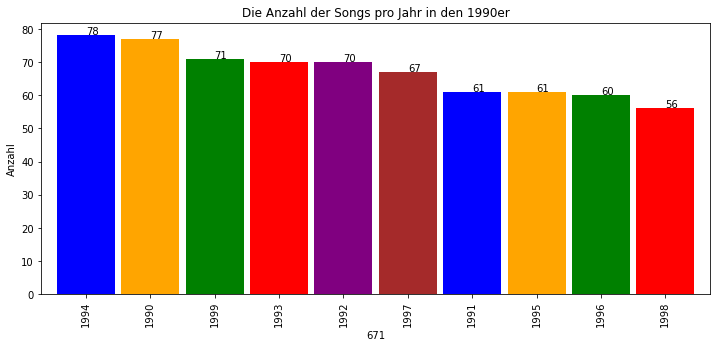

In [37]:
s = e['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(e.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 1990er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

### 2000er

In [30]:
f = songs[songs['decades'] == "2000s"]

Text(0, 0.5, 'Anzahl')

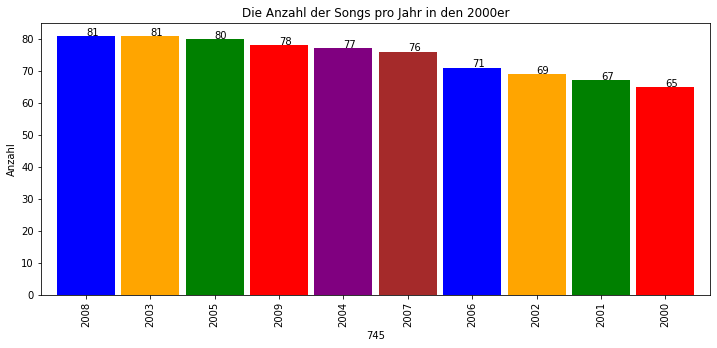

In [36]:
s = f['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(f.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 2000er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

### 2010er

In [34]:
g = songs[songs['decades'] == "2010s"]

Text(0, 0.5, 'Anzahl')

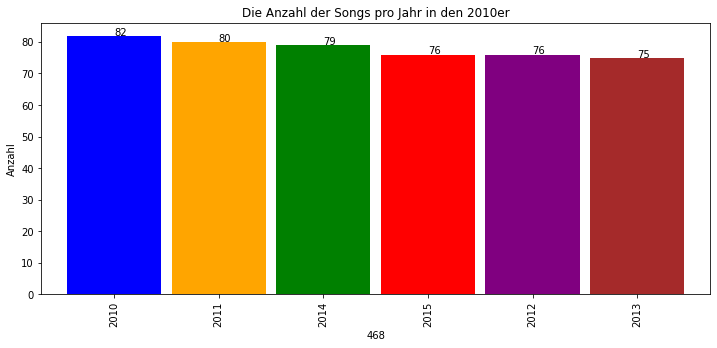

In [35]:
s = g['year'].value_counts().head(20)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.year + 0.2 , v.year, color='black')

ax.set_xlabel(len(g.decades))
plt.title("Die Anzahl der Songs pro Jahr in den 2010er")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

## The Top 10 of the number of artists that appear most frequently in the Top 100 

Text(0, 0.5, 'Anzahl')

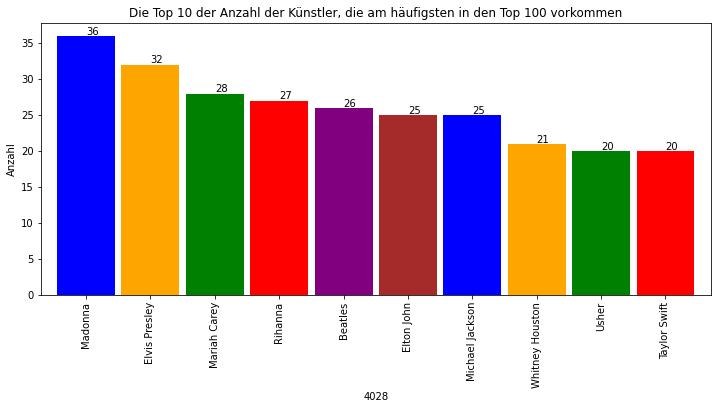

In [46]:
s = songs['artist'].value_counts().head(10)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,5))

ax=s.plot.bar(width=.9, color=('blue', 'orange', 'green', 'red', 'purple', 'brown')) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.artist + 0.2 , v.artist, color='black')

ax.set_xlabel(len(songs.artist))
plt.title("Die Top 10 der Anzahl der Künstler, die am häufigsten in den Top 100 vorkommen")
#plt.xlabel(len(df.Bemerkungen))
plt.ylabel('Anzahl')
#pltcountplotfig("songs_per_genre")
#plt.savefig('../Grafiken/Grafiken_SMS_2018_2019/Auswertung_SMS_2018_2019_BD.png', bbox_inches = "tight")

## Output CSV files of the 1950s

In [55]:
sample = pd.read_csv("../../data/CSV/1950er/1950.csv")

In [56]:
sample

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes
0,"Mona Lisa, Mona Lisa, men have named you\nYou'...","['american', 'death by lung cancer', 'easy lis...",189.0,2,1950,5.2,88.74,145,17,"{'neg': 0.155, 'neu': 0.646, 'pos': 0.199, 'co...",Mona Lisa,2.9,Nat King Cole,13,10
1,I wanna be Loved\nBy Andrews Sisters\n\nOooo-o...,['andrews sisters'],270.9,17,1950,4.4,82.31,189,31,"{'neg': 0.036000000000000004, 'neu': 0.74, 'po...",I Wanna Be Loved,3.3,Andrews Sisters,40,32
2,I was dancing with my darling to the Tennessee...,"['country', 'pop']",174.6,18,1950,5.2,88.74,138,16,"{'neg': 0.053, 'neu': 0.596, 'pos': 0.35100000...",Tennessee Waltz,2.9,Patti Page,5,10
3,Each time I hold someone new\nMy arms grow col...,"['death by liver failure', 'spiritual']",135.9,20,1950,4.4,99.23,117,18,"{'neg': 0.167, 'neu': 0.602, 'pos': 0.231, 'co...",I'll Never Be Free,0.9,Tennessee Ernie Ford,10,3
4,"Unfortunately, we are not licensed to display ...","['country', 'pop']",46.8,21,1950,6.0,69.79,32,3,"{'neg': 0.07, 'neu': 0.85, 'pos': 0.079, 'comp...",All My Love,6.0,Patti Page,9,0
5,"Hoop dee doo, hoop dee doo, \nI hear a polka ...","['adult contemporary', 'american', 'big band',...",423.0,25,1950,4.8,106.67,382,54,"{'neg': 0.04, 'neu': 0.779, 'pos': 0.182, 'com...",Hoop-Dee-Doo,0.1,Perry Como,22,22
6,i love those dear hearts and gentle people\nwh...,"['american', 'christmas music', 'death by hear...",303.3,29,1950,4.4,90.77,239,39,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.4120000000...",Dear Hearts And Gentle People,2.1,Bing Crosby,12,17
7,"My heart knows what the wild goose knows,\nI m...",['death by heart failure'],350.1,30,1950,4.8,106.67,306,40,"{'neg': 0.038, 'neu': 0.881, 'pos': 0.081, 'co...",Cry Of The Wild Goose,0.1,Frankie Laine,15,18


In [57]:
sample1 = pd.read_csv("../../data/CSV/1950er/1952.csv")

In [58]:
sample1

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes
0,if you loved me half as much as i love you\nyo...,"['american', 'jazz', 'pop', 'vocal jazz']",161.1,6,1952,6.0,103.63,145,14,"{'neg': 0.073, 'neu': 0.732, 'pos': 0.195, 'co...",Half As Much,1.3,Rosemary Clooney,6,7
1,I went to your wedding\nAlthough I was dreadin...,"['country', 'pop']",157.5,8,1952,3.6,92.80,119,27,"{'neg': 0.249, 'neu': 0.5740000000000001, 'pos...",I Went To Your Wedding,1.3,Patti Page,16,17
2,"Here in my heart I'm alone, I'm so lonely\nHer...",['classic pop and rock'],138.6,9,1952,5.6,96.18,115,12,"{'neg': 0.089, 'neu': 0.639, 'pos': 0.273, 'co...",Here In My Heart,2.1,Al Martino,7,5
3,Botch-a-me\nI'll-botcha you and ev'rything goe...,"['american', 'jazz', 'pop', 'vocal jazz']",256.5,16,1952,4.0,66.40,164,31,"{'neg': 0.041, 'neu': 0.865, 'pos': 0.094, 'co...",Botch-a-me,5.2,Rosemary Clooney,25,24
4,I walked down the street like a good girl shou...,"['american', 'big band', 'easy listening sound...",362.7,17,1952,6.0,95.17,314,31,"{'neg': 0.016, 'neu': 0.778, 'pos': 0.20600000...",A Guy Is A Guy,2.5,Doris Day,14,18
5,"Do not forsake me, oh, my darlin'\nOn this, ou...",['death by heart failure'],206.1,19,1952,4.8,98.21,168,24,"{'neg': 0.105, 'neu': 0.805, 'pos': 0.09, 'com...",High Noon,1.3,Frankie Laine,22,6


In [59]:
sample2 = pd.read_csv("../../data/CSV/1950er/1953.csv")

In [60]:
sample2

,lyrics,tags,num_syllables,pos,year,fog_index,flesch_index,num_words,num_lines,sentiment,title,f_k_grade,artist,difficult_words,num_dupes
0,No other love have I\nOnly my love for you! \n...,"['adult contemporary', 'american', 'big band',...",153.9,8,1953,3.6,101.26,129,29,"{'neg': 0.14, 'neu': 0.54, 'pos': 0.319, 'comp...",No Other Love,0.1,Perry Como,9,16
1,(Pa pa pa pia)\n(Pa pa pa pia)\n\nDon't let th...,"['adult contemporary', 'american', 'big band',...",337.5,9,1953,4.4,107.69,297,48,"{'neg': 0.006, 'neu': 0.878, 'pos': 0.115, 'co...",Don't Let The Stars Get In Your Eyes,-0.3,Perry Como,11,27
2,I believe for every drop of rain that falls \n...,['death by heart failure'],179.1,10,1953,4.4,90.77,133,21,"{'neg': 0.152, 'neu': 0.769, 'pos': 0.079, 'co...",I Believe,2.1,Frankie Laine,12,1
3,First the tide rushes in\nPlants a kiss on the...,['production music'],104.4,12,1953,4.0,100.24,89,15,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.2070000000...",Ebb Tide,0.5,Frank Chacksfield,5,2
4,Pretend you're happy when you're blue\nIt isn'...,"['american', 'death by lung cancer', 'easy lis...",119.7,13,1953,4.4,99.23,99,15,"{'neg': 0.078, 'neu': 0.7000000000000001, 'pos...",Pretend,0.9,Nat King Cole,9,0
5,I know I'd go from rags to riches\nIf you woul...,"['american', 'jazz', 'pop']",191.7,19,1953,4.8,98.21,160,22,"{'neg': 0.023, 'neu': 0.8280000000000001, 'pos...",Rags To Riches,1.3,Tony Bennett,10,12
6,"Say the sun will never shine again, \nAnd say ...","['adult contemporary', 'american', 'big band',...",172.8,21,1953,4.8,98.21,142,18,"{'neg': 0.067, 'neu': 0.775, 'pos': 0.158, 'co...",Say You're Mine Again,1.3,Perry Como,11,5
7,"Tell me story, tell me story\nTell me story, r...",['death by heart failure'],388.8,23,1953,4.8,98.21,325,43,"{'neg': 0.059000000000000004, 'neu': 0.853, 'p...",Tell Me A Story,1.3,Frankie Laine,31,14
8,C'est si bon\nLovers say that in France\nWhen ...,"['american', 'jazz']",107.1,29,1953,3.6,101.26,92,19,"{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...",C'est Si Bon,0.1,Eartha Kitt,9,4
